In [1]:
library(pacman)
p_load(xts, zoo, dplyr, tidyverse, ggplot2, forecast)

Warning message:
"package 'pacman' was built under R version 4.1.2"


In [2]:
df <- read.csv("./data/01_processed_output.csv")
z <- as.xts(read.zoo(df, format = "%Y-%m-%d"))
head(z)

           [,1]
2009-06-12 26.2
2009-06-13 28.0
2009-06-14 27.4
2009-06-15 26.8
2009-06-16 27.9
2009-06-17 28.4

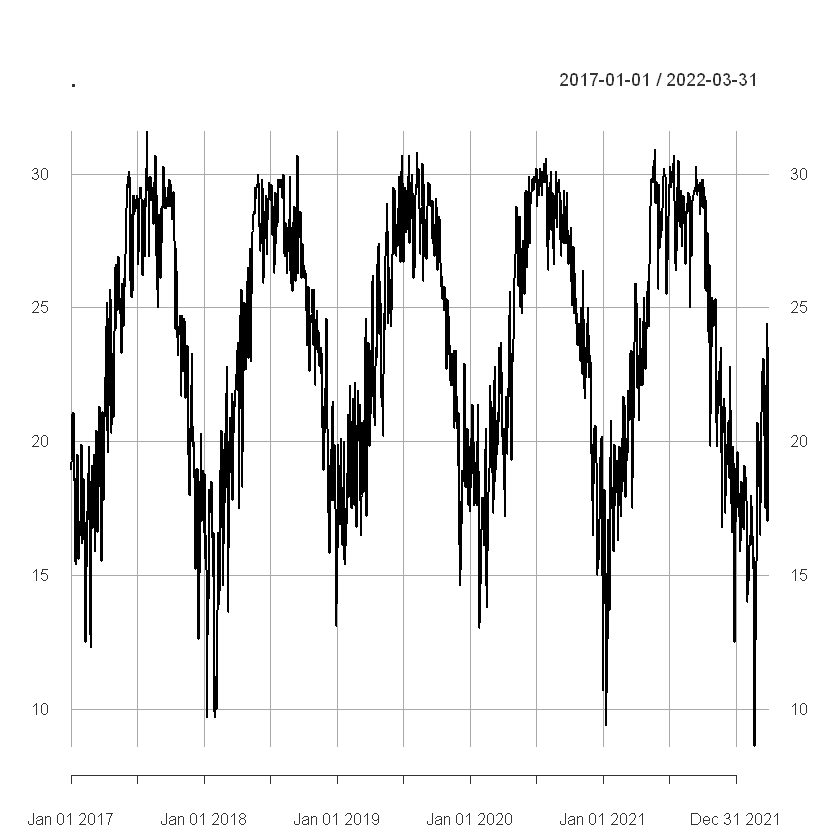

In [3]:
z.sub <- z["2017-01::2022-03"]
z.sub %>% plot()

Warning message:
"Removed 365 rows containing missing values (geom_point)."


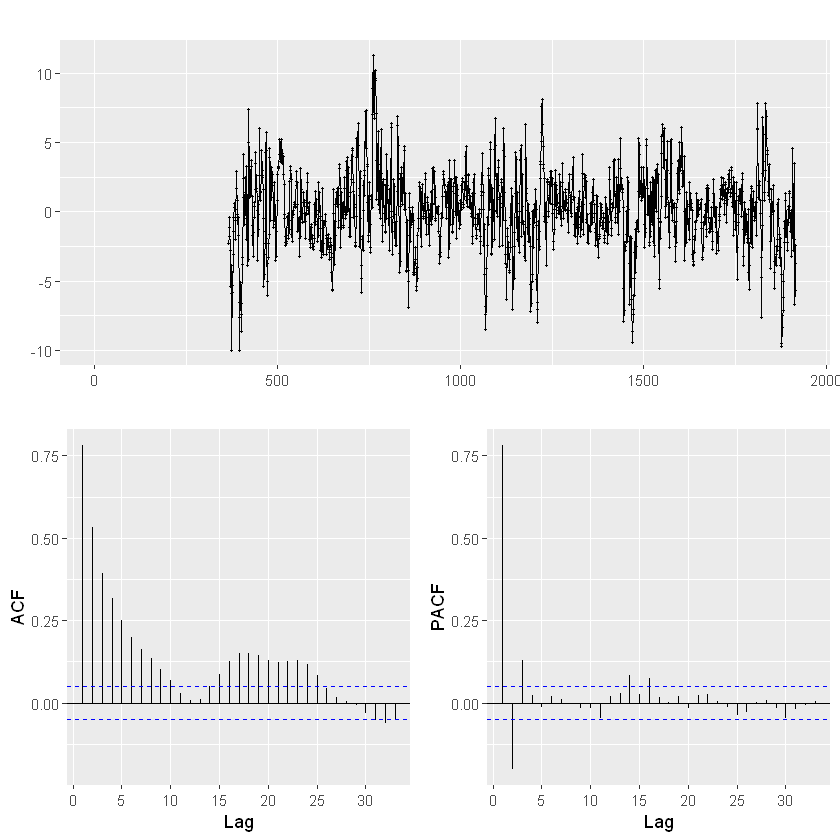

In [4]:
z.sub %>% diff(lag=365) %>% ggtsdisplay()

In [5]:
auto.arima(z, seasonal=TRUE)

Series: z 
ARIMA(5,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5     mean
      1.0943  -0.3740  0.1802  -0.0086  0.0844  23.3296
s.e.  0.0146   0.0216  0.0222   0.0217  0.0146   0.7582

sigma^2 = 1.543:  log likelihood = -7647.95
AIC=15309.91   AICc=15309.93   BIC=15355.06

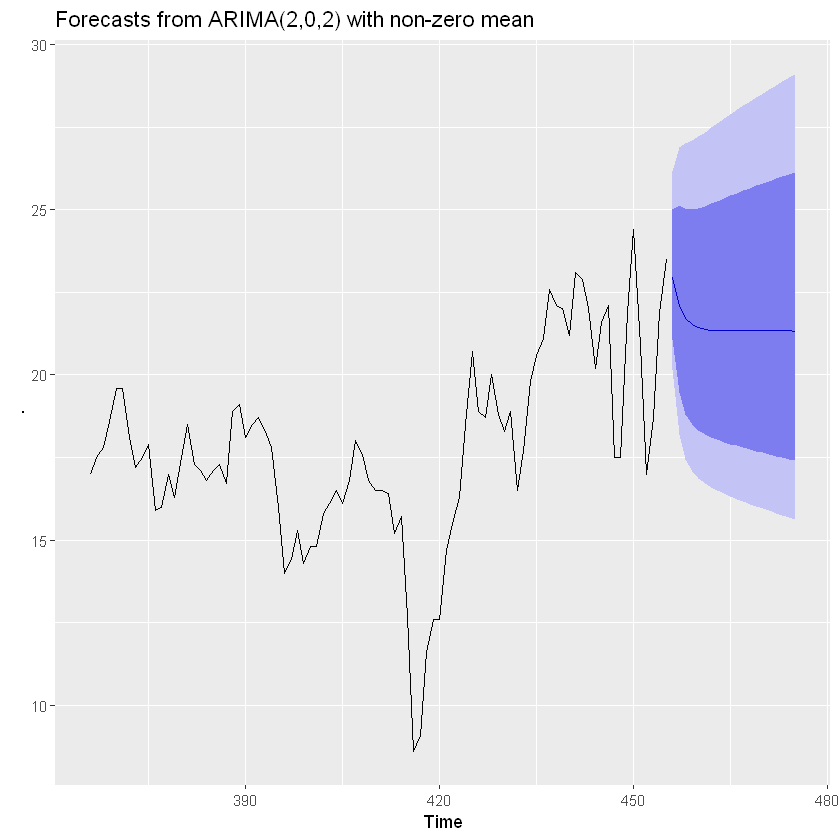

In [18]:
z.sub["2021/2022"] %>%
  Arima(order=c(2,0,2), seasonal=c(0,1,0), lambda=0) %>%
  forecast(20) %>%
  autoplot(include=90)